discriminative classification: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

In [1]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data


In [3]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\pricing_promo_2019_2021_all.csv')
data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,...,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
0,2019-03-01,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
1,2019-03-02,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81


In [4]:
for i in range(len(data.columns)):
    print(i,data.columns[i])

0 Date
1 Amount of Employee pricing % off
2 off Particular Item?
3 Amount of % Off Particular Item
4 Location Specific?
5 off 1st item?
6 Amount of % off 1st item
7 off conditional?
8 Amount of $ off conditional
9 Amount of % off conditional
10 off HomeStore Specials?
11 Amount of % Off Homestore Specials 
12 Amount of % off Reg Price Living, Dining, amd M. Bedroom 
13 % off reg. price living, dining, and m. bedroom?
14 off rest of purchase?
15 Amount of % off rest of purchase 
16 off sectionals?
17 Amount % off sectionals 
18 amount of % off sofa w/ full price loveseat 
19 sofa w full-price loveseat?
20 Amount of % Accessories
21 Add. % off CLA?
22 Amount of % Off CLA 
23 off JUV?
24 Amount of % Off JUV 
25 off OTB (occasional tables)?
26 Amount of % Off OTB(occasional tables)
27  Financing?
28 Amount of % When Financing 
29 Amount of % With Rest Test 
30 Amount % Off at 090
31 Amount % off in AB
32 Amount % off in GTA
33 Amount % off in MB
34 Amount % Savings over $2499
35 Amount of 

In [5]:
# # EXCLUDE COVID RELATED DATA
# data = data.drop(columns = data.columns[80:-4], axis = 1)
# data.head()

In [6]:
data.isna().sum().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Columns: 105 entries, Date to FinancedAmount
dtypes: float64(25), int64(79), object(1)
memory usage: 850.8+ KB


In [8]:
feature = "WrittenSales"
# print(data[feature])

In [9]:
data[feature] = pd.to_numeric(data[feature], errors='coerce') 
# print(data.info())
data[feature] 

0        267388.65
1        668799.75
2        671177.75
3        265077.82
4        161678.91
           ...    
1032    1976177.99
1033    1211572.83
1034    1057772.56
1035    1353736.67
1036     778688.29
Name: WrittenSales, Length: 1037, dtype: float64

In [13]:
data["WrittenSales"].min(), data["WrittenSales"].max()

(-335377.80999999994, 3527566.7700000005)

In [195]:
bins = [-500000,250000,350000,500000,650000,900000, 3600000]
names = [1,2,3,4,5,6]

In [196]:
data["Range"] = pd.cut(data[feature], bins, labels=names)

data["Range"] = pd.Categorical(data["Range"]) 
print(data["Range"].unique())

[2, 5, 1, 3, 6, 4]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


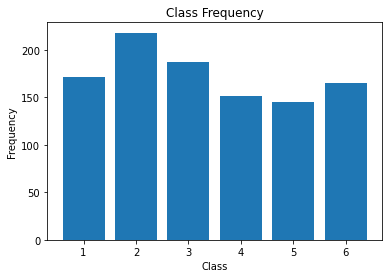

In [197]:
unique, counts = np.unique(data["Range"], return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [199]:
data[feature].max(), data[feature].max()+1000

(3527566.7700000005, 3528566.7700000005)

In [200]:
data.isna().sum().sum()

0

In [201]:
# data = data.dropna()
# data.isna().sum().sum()

In [202]:
data[["WrittenSales", "Range"]]

,WrittenSales,Range
0,267388.65,2
1,668799.75,5
2,671177.75,5
3,265077.82,2
4,161678.91,1
...,...,...
1032,1976177.99,6
1033,1211572.83,6
1034,1057772.56,6
1035,1353736.67,6


In [203]:
print(data["Range"].unique())

[2, 5, 1, 3, 6, 4]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


# Train - Test Split

In [204]:
y = data.Range.astype(int).values

X = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1).values

X_df = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1)

In [205]:
y.shape,X.shape

((1037,), (1037, 100))

In [206]:
# # %% train test split
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Training target statistics: Counter({2: 150, 3: 130, 1: 120, 6: 118, 4: 105, 5: 102})
Testing target statistics: Counter({2: 68, 3: 57, 1: 51, 6: 47, 4: 46, 5: 43})
Number transactions X_train dataset:  (725, 100)
Number transactions y_train dataset:  (725,)
Number transactions X_test dataset:  (312, 100)
Number transactions y_test dataset:  (312,)


## Feature Scaling

In [207]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Oversampling

In [208]:
# from imblearn.over_sampling import SMOTE

# print("Before OverSampling, counts of labels': {}".format(Counter(y_train)))

# oversample = SMOTE()
# X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())

In [209]:
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(Counter(y_train_res)))

In [210]:
data[feature].max(),data["Range"].max()

(3527566.7700000005, 6)

## Applying PCA

In [211]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Grid Search

In [212]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


In [237]:
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)

prediction = svm.predict(X_test)
print(" {} nn score: {} ".format(3,svm.score(X_test,y_test)))

 3 nn score: 0.3076923076923077 


In [214]:
svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [215]:
# defining parameter range
param_dict = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf']}

In [216]:
clf = GridSearchCV(svm, 
                   param_grid = param_dict,
                   cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=3,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=5)

In [217]:
clf.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [218]:
clf.best_estimator_

SVC(C=1000, gamma=0.1, random_state=1)

In [219]:
svm1 = SVC(**clf.best_params_)

svm1.fit(X_train, y_train.ravel())

SVC(C=1000, gamma=0.1)

In [220]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [221]:
# X_train = X_train_res.T
# X_test = X_test.T
# y_train = y_train_res.T
# y_test = y_test.T

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (725, 2)
X_test:  (312, 2)
y_train:  (725,)
y_test:  (312,)


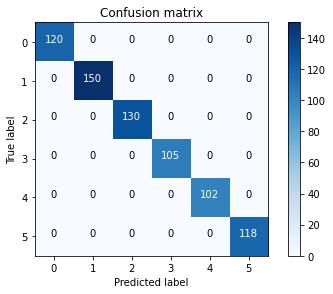

In [223]:
y_train_pre = svm1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train)
class_names = [0,1,2,3,4,5]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [224]:
print(classification_report(y_train, svm1.predict(X_train)))

              precision    recall  f1-score   support

           1       0.43      0.47      0.45       120
           2       0.30      0.69      0.42       150
           3       0.40      0.21      0.27       130
           4       0.42      0.30      0.35       105
           5       0.63      0.17      0.26       102
           6       0.60      0.42      0.49       118

    accuracy                           0.39       725
   macro avg       0.46      0.38      0.38       725
weighted avg       0.45      0.39      0.38       725



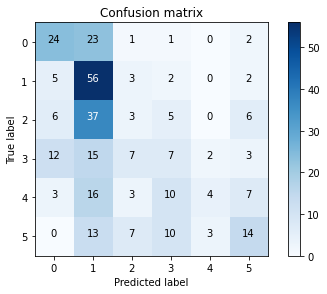

In [225]:
y_pre = svm1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)
# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [226]:
print(classification_report(y_test, svm1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.48      0.47      0.48        51
           2       0.35      0.82      0.49        68
           3       0.12      0.05      0.07        57
           4       0.20      0.15      0.17        46
           5       0.44      0.09      0.15        43
           6       0.41      0.30      0.35        47

    accuracy                           0.35       312
   macro avg       0.34      0.31      0.29       312
weighted avg       0.33      0.35      0.30       312



In [227]:
# Get support vector indices
support_vector_indices = svm1.support_
print(support_vector_indices)

[  2  13  24  34  35  43  44  53  54  75  95  97 121 130 138 144 147 148
 153 164 165 171 189 199 224 228 236 242 247 253 254 256 261 263 270 282
 287 300 302 306 311 312 320 328 335 343 348 357 363 366 369 375 384 385
 386 400 406 416 420 421 422 427 443 460 480 481 490 493 497 501 509 510
 515 524 526 529 543 551 552 558 563 565 580 581 585 589 596 598 600 601
 607 618 620 622 631 644 649 653 656 658 663 670 673 675 682 684 685 689
 700 707 713 721  11  20  21  27  40  55  56  65  68  73  79  85  87  88
  92  96 102 103 110 115 123 125 132 134 157 163 167 178 182 198 201 217
 220 221 222 227 231 238 239 246 248 252 259 267 272 277 280 281 290 292
 294 298 301 304 313 314 318 321 326 330 331 334 337 344 349 350 353 354
 355 360 379 380 392 393 398 399 407 414 418 436 439 444 445 448 449 458
 466 483 488 495 496 502 504 506 511 516 527 531 533 535 536 538 545 547
 548 550 556 560 564 566 567 568 570 571 572 587 599 602 605 617 619 626
 630 632 636 637 642 643 647 650 651 654 667 669 67

In [228]:
# Get number of support vectors per class
support_vectors_per_class = svm1.n_support_
print(support_vectors_per_class)

[112 144 129 104 101 105]


In [232]:
len(support_vectors)

695

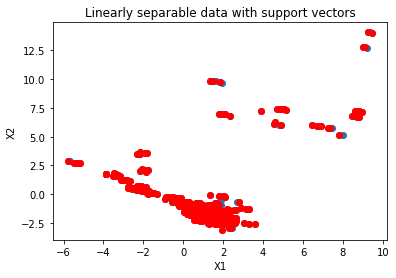

In [233]:
# Get support vectors themselves
support_vectors = svm1.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

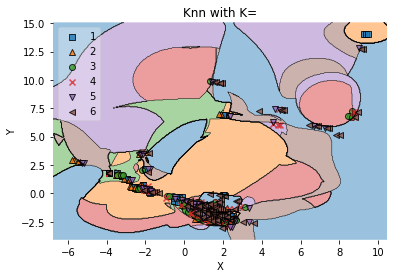

In [235]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision region
plot_decision_regions(X_train, y_train, clf=svm1, legend=2)
# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K=')
plt.show()